## Install YOLOv8



In [1]:
!pip install ultralytics==8.2.103 -q
!pip install roboflow
from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/107.7 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## BIGTOR YOLOV8 Model Training

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="w8wNAObM4JzOEvSaX0V5")
project = rf.workspace("seipppp").project("palm-tree-detection-v2")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 batch = 16 plots=True

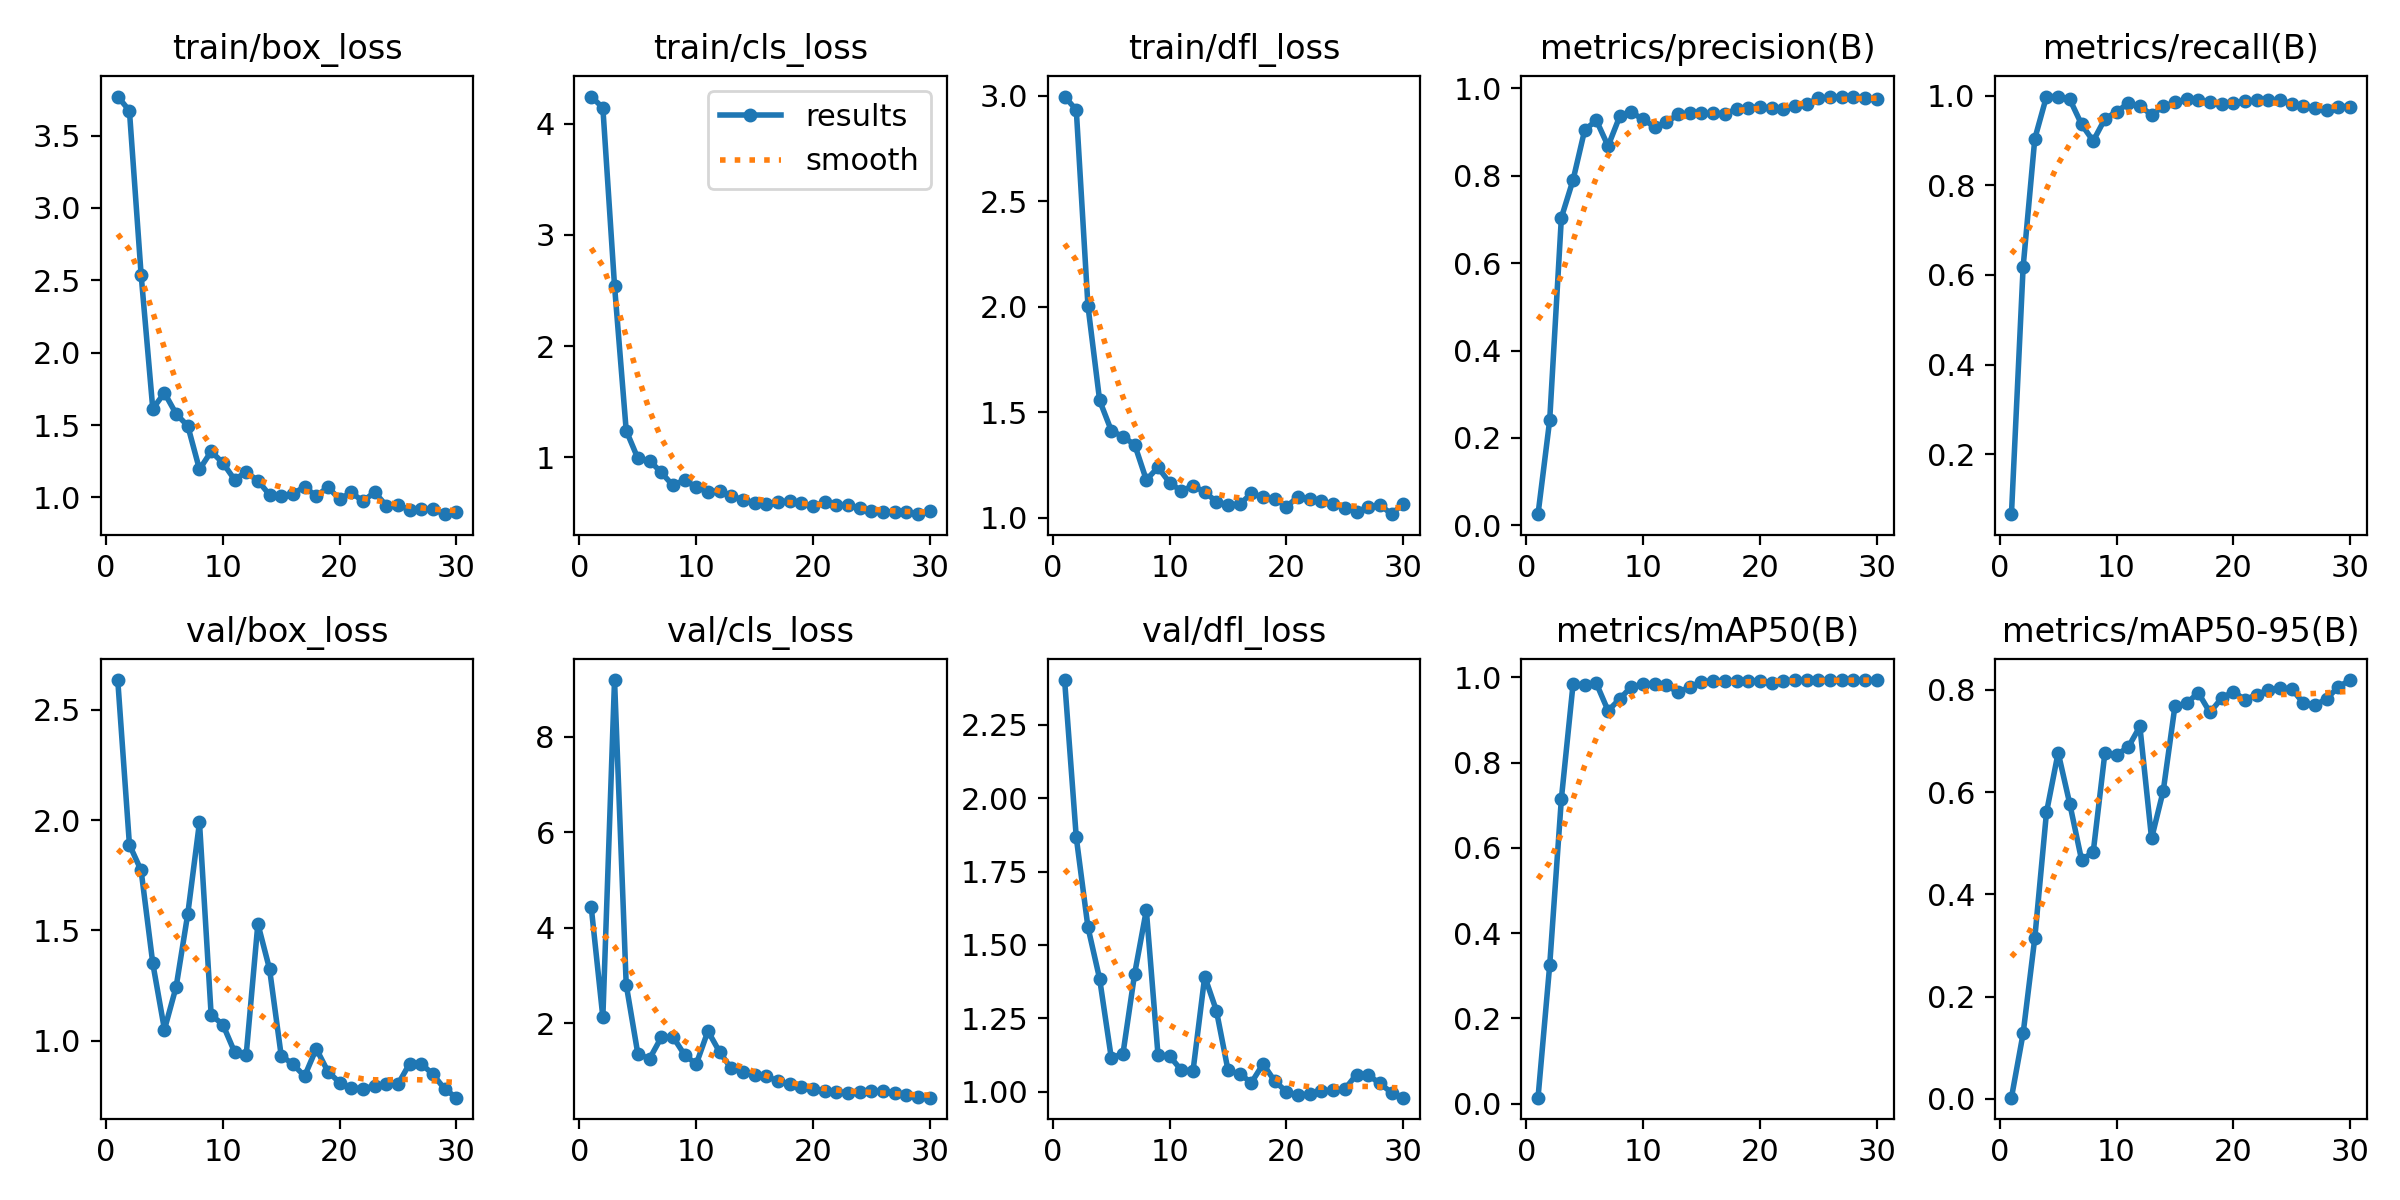

In [ ]:
# %cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

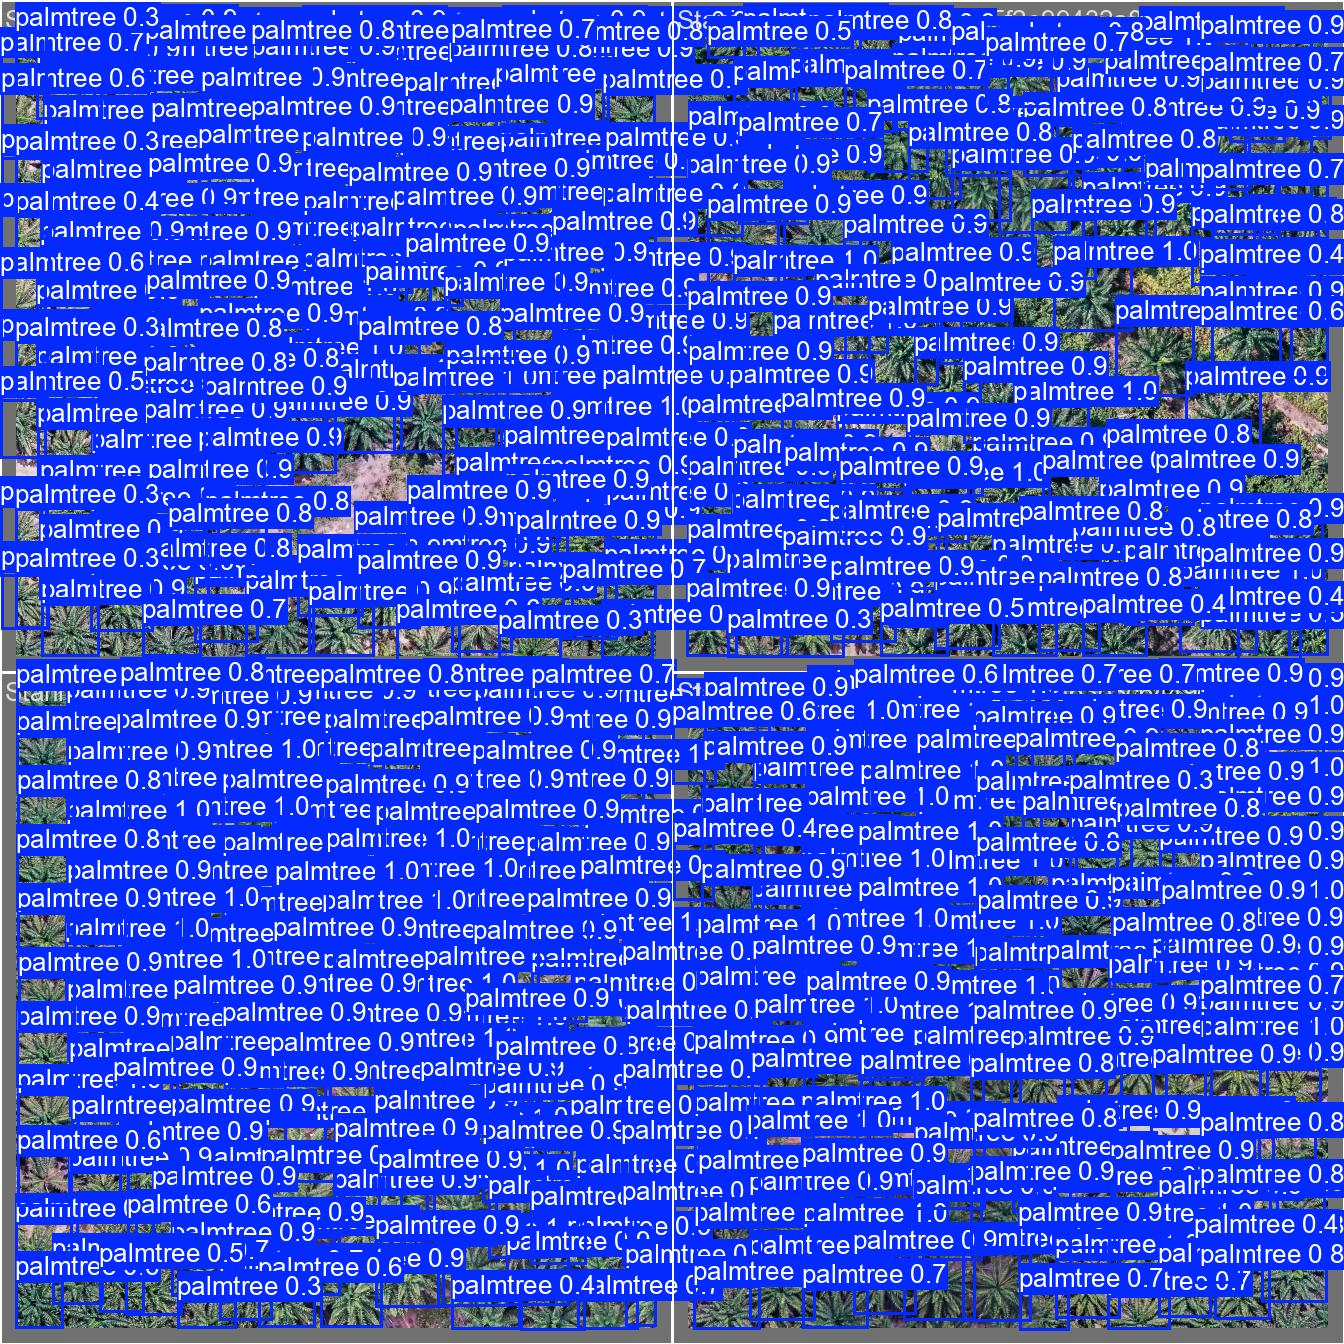

In [ ]:
# %cd {HOME}
Image('/content/runs/detect/train/val_batch0_pred.jpg', width=640)

## Validate Custom Model

In [ ]:
# %cd {HOME}

!yolo task=detect mode=val model='runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/palm-tree-detection-v2-3/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.27it/s]
                   all          4        468      0.974      0.976      0.993      0.821
Speed: 0.3ms preprocess, 29.8ms inference, 0.0ms loss, 39.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
# %cd {HOME}
!yolo task=detect mode=predict model= /content/runs/detect/train/weights/best.pt conf=0.80 iou = 0.50 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /content/palm-tree-detection-v2-3/test/images/Stand_10_png.rf.fa7683c2db9e8d4fa1f22f39a71fb007.jpg: 640x640 117 palmtrees, 16.2ms
image 2/2 /content/palm-tree-detection-v2-3/test/images/Stani_08_png.rf.3466b0c0c5cc7d78535a859aeda413bd.jpg: 640x640 116 palmtrees, 16.2ms
Speed: 4.2ms preprocess, 16.2ms inference, 72.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


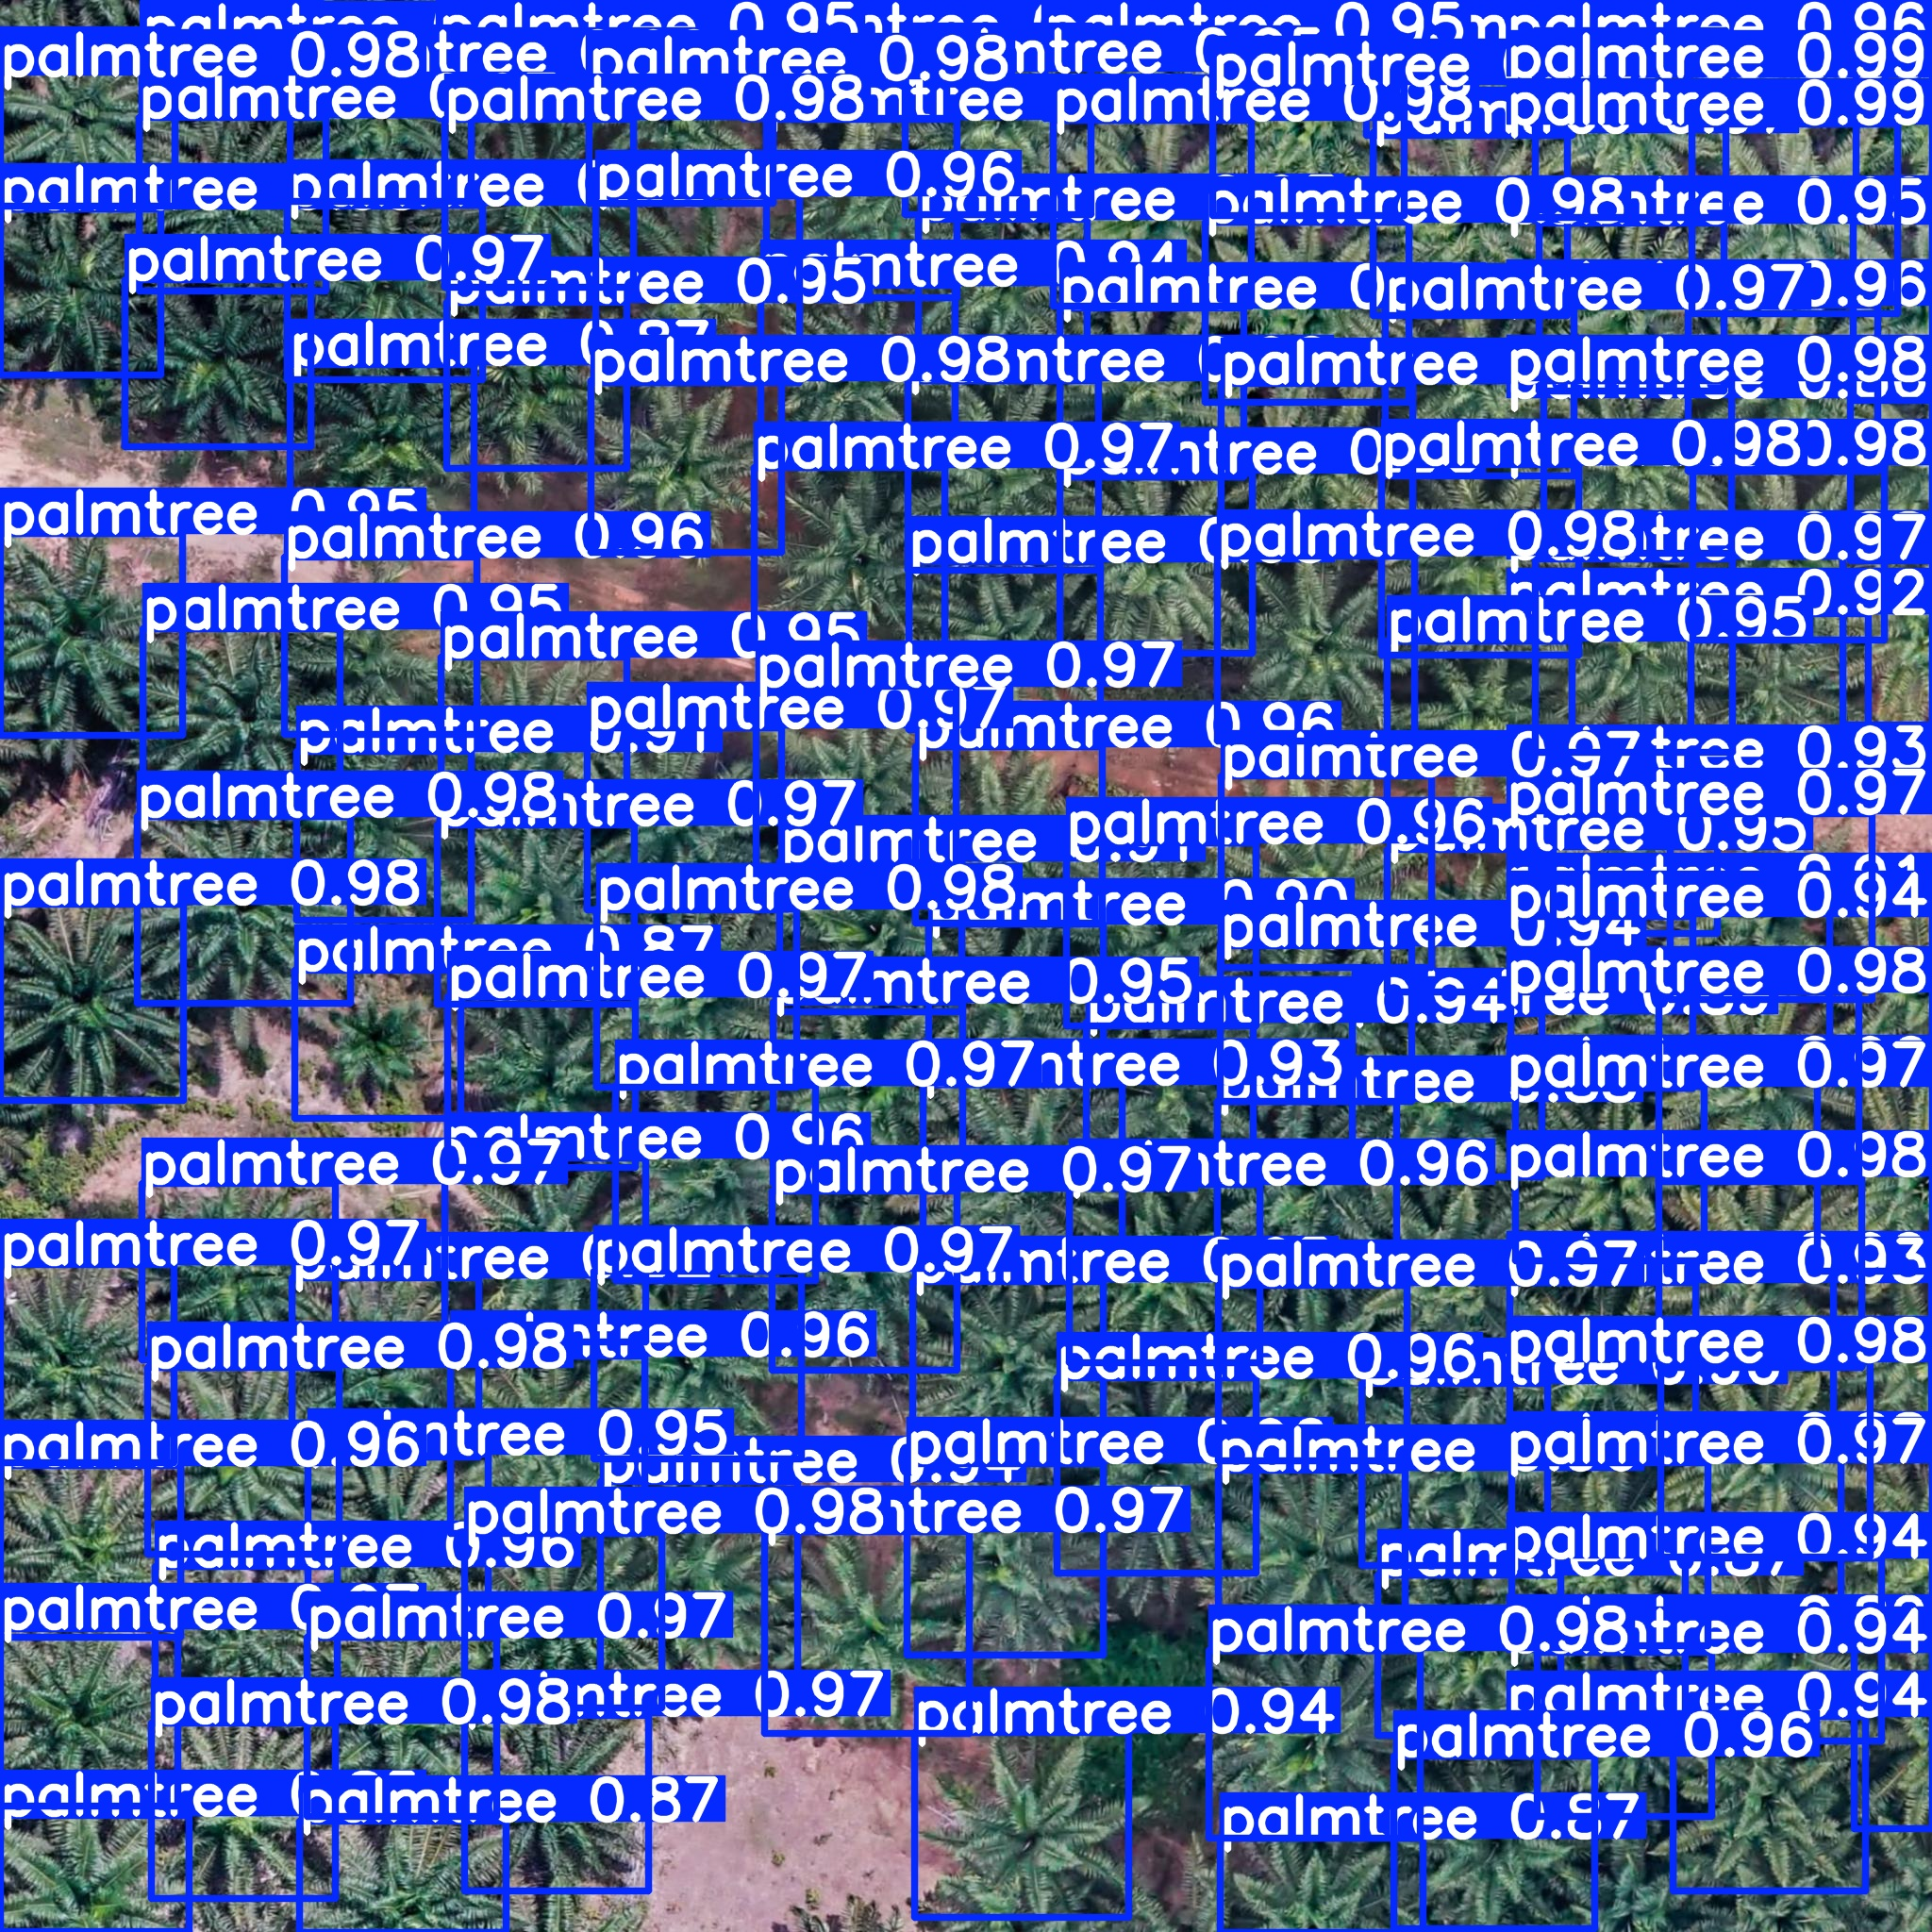

In [ ]:
Image('/content/runs/detect/predict/Stand_10_png.rf.fa7683c2db9e8d4fa1f22f39a71fb007.jpg', width=640)

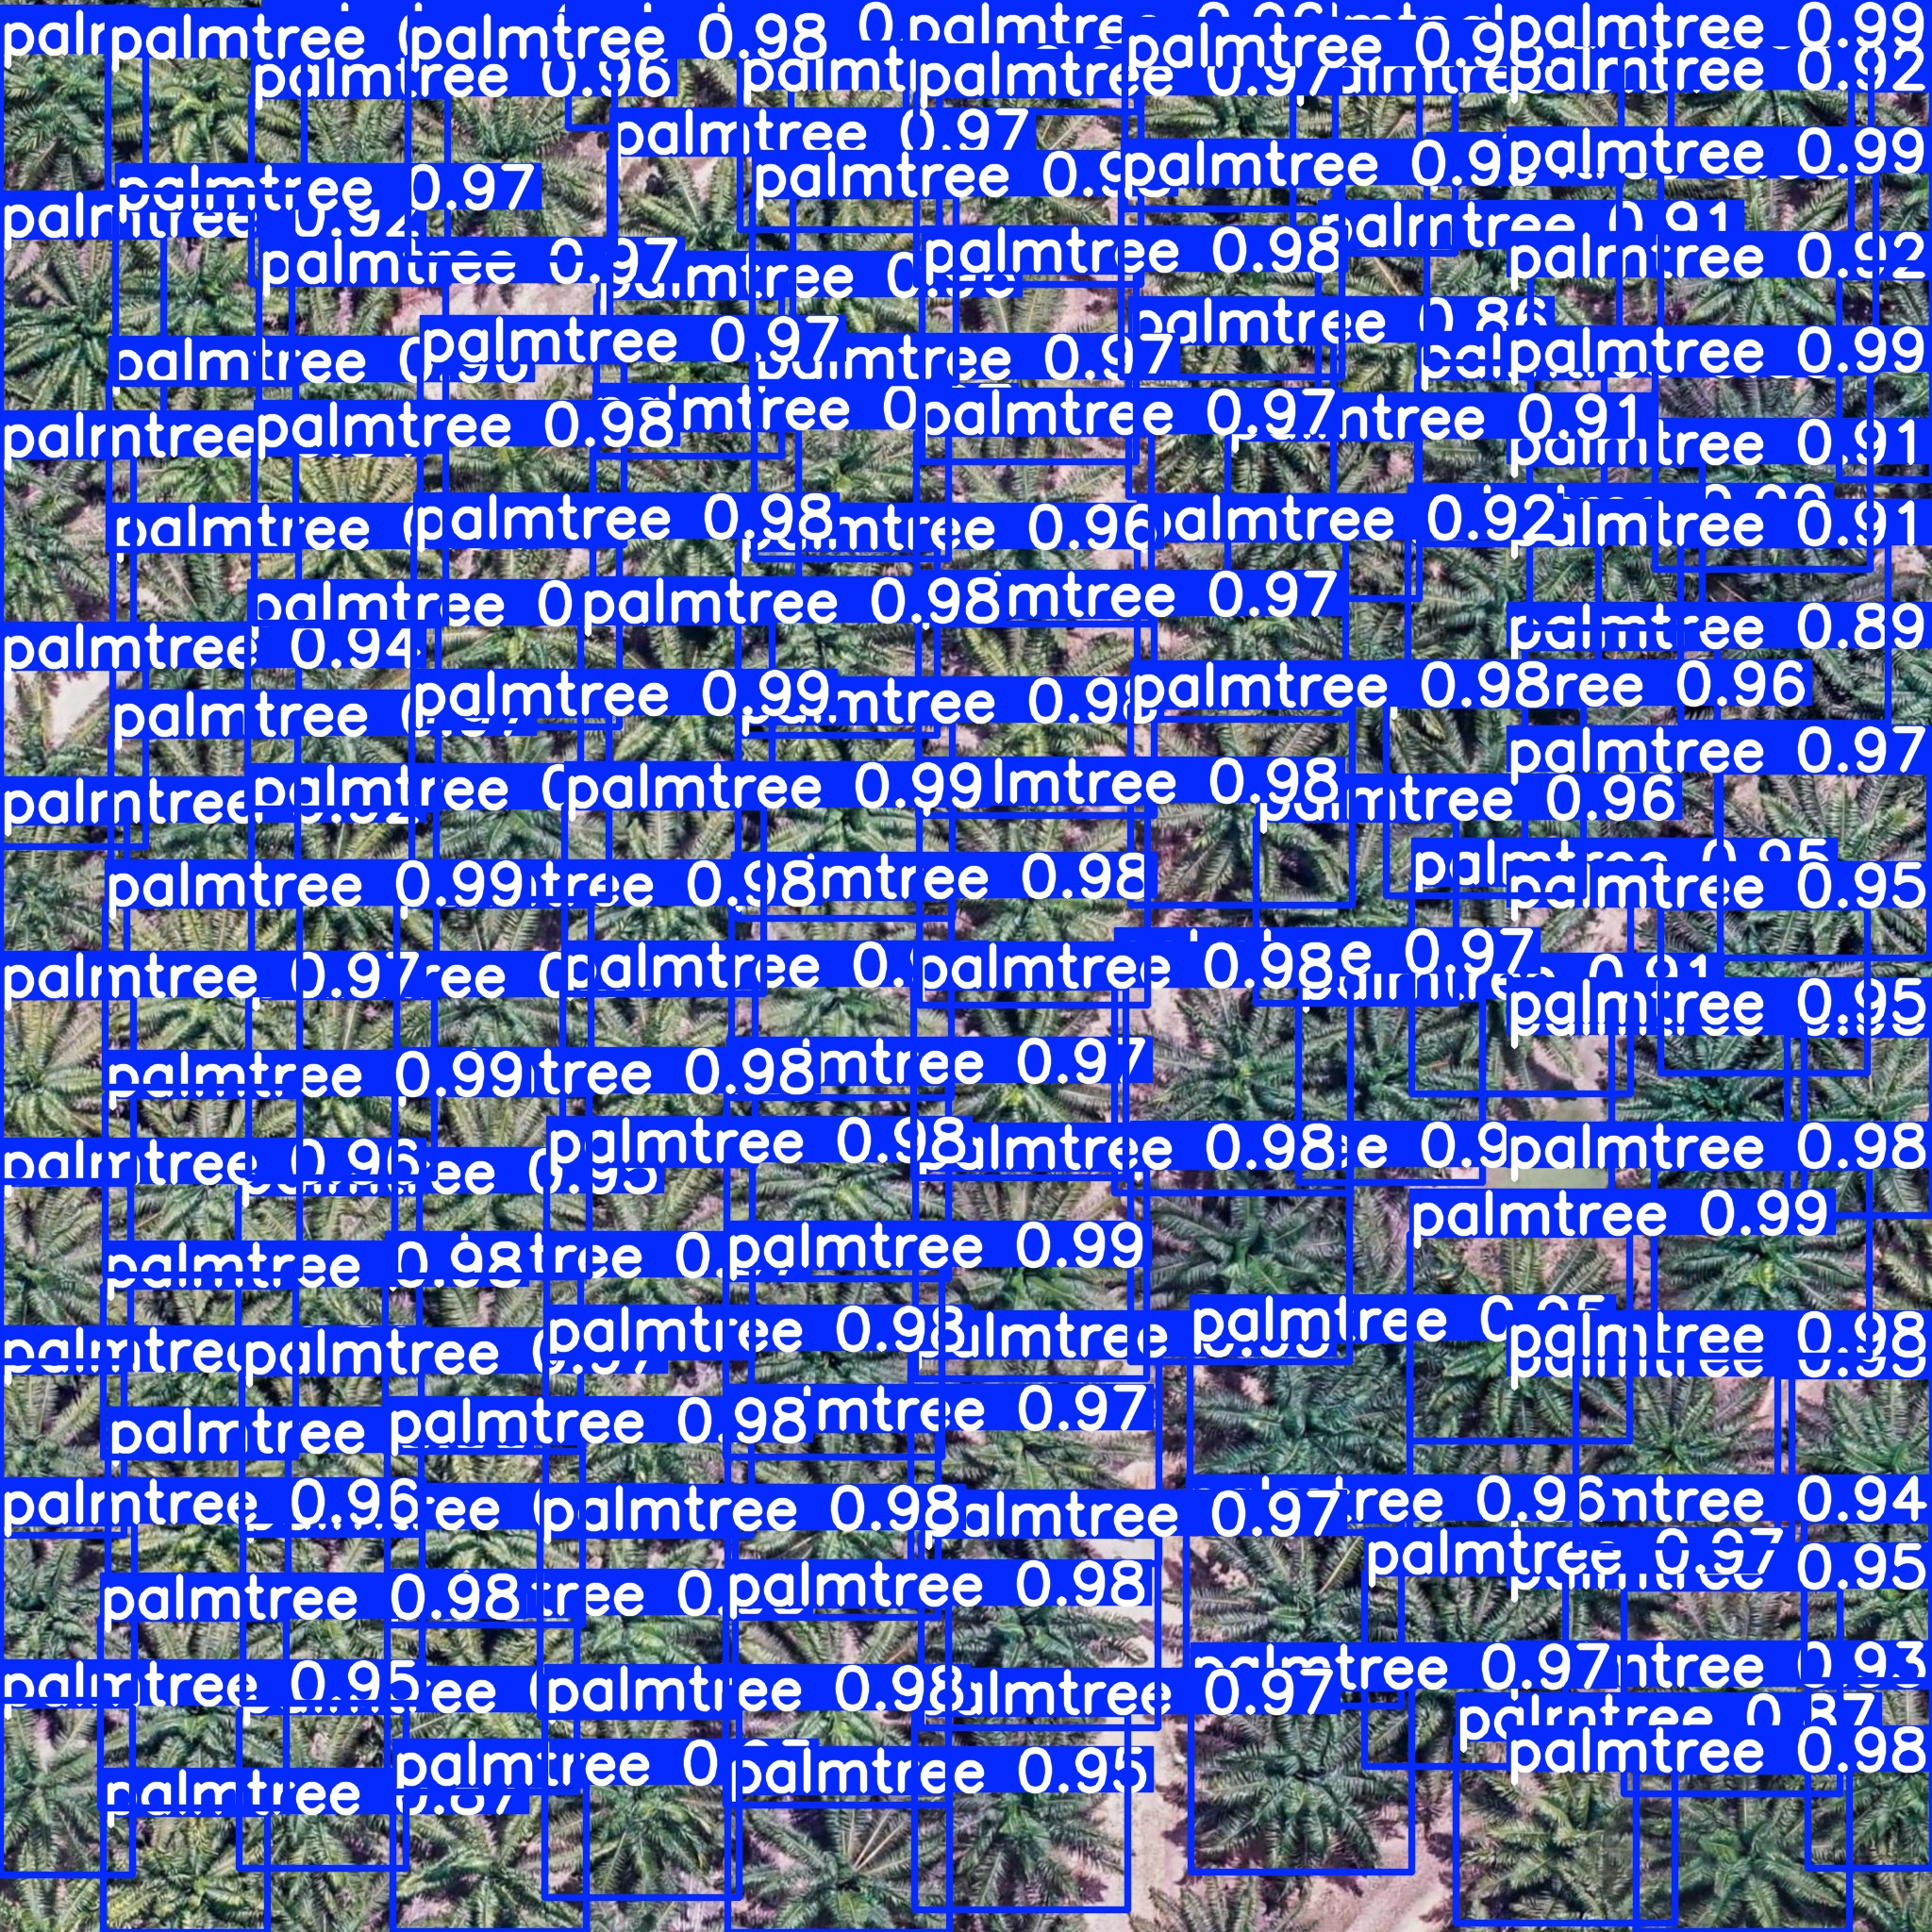

In [ ]:
Image('/content/runs/detect/predict/Stani_08_png.rf.3466b0c0c5cc7d78535a859aeda413bd.jpg', width=640)